In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

import os
print(os.listdir())

['.ipynb_checkpoints', 'googleplaystore.csv', 'googleplaystore_user_reviews.csv', 'Untitled.ipynb']


In [8]:
store = pd.read_csv("googleplaystore.csv",usecols = [0,1,2,3,4,5,6,7,8,9,10]) 

In [11]:
store.info()
store.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content_Rating    10840 non-null object
Genres            10841 non-null object
Last_Updated      10841 non-null object
dtypes: float64(1), object(10)
memory usage: 931.7+ KB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"


In [10]:
store.columns = store.columns.str.replace(" ","_")

In [12]:
store.Size = store.Size.replace("Varies with device",np.nan)
store.Size = store.Size.str.replace("M","000")
store.Size = store.Size.str.replace("k","")
#store.Size = store.Size.apply(lambda x: float(x.replace("k",""))/1000 if "k" in x else x)
#ı wanted use this but ı get error so ı added "000" to Megabyte

store.Size = store.Size.replace("1,000+",1000)

store.Installs = store.Installs.str.replace(",","")
store.Installs = store.Installs.apply(lambda x: x.strip("+"))
store.Installs = store.Installs.replace("Free",np.nan)

store.Price = store.Price.str.replace("$","")

store = store.drop(store.index[10472])

store[["Size","Installs","Reviews","Price"]] = store[["Size","Installs","Reviews","Price"]].astype("float")

In [13]:
store.Installs = pd.to_numeric(store.Installs)
store.Price = pd.to_numeric(store.Price)
store = store.drop_duplicates(subset = "App" ,keep = "first")

In [14]:
store.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.055081,0.061223,0.040143,-0.021199
Reviews,0.055081,1.000000,0.176255,0.625165,-0.007598
Size,0.061223,0.176255,1.000000,0.133988,-0.022141
Installs,0.040143,0.625165,0.133988,1.000000,-0.009405
Price,-0.021199,-0.007598,-0.022141,-0.009405,1.000000


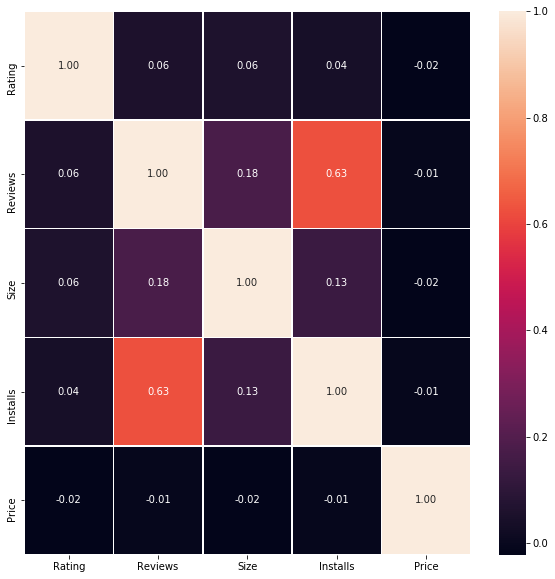

In [15]:
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(store.corr(), annot = True, linewidths = .5, fmt = ".2f", ax=ax)

Text(0.5,0,'Rating')

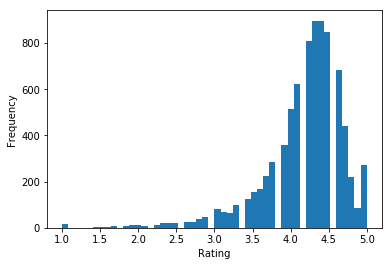

In [17]:
store.Rating.plot(kind = 'hist', bins = 50)
plt.xlabel('Rating')

C:\Users\jnewm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\jnewm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0,0.5,'Frequency')

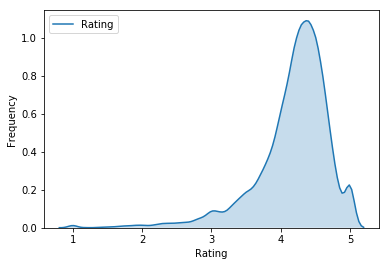

In [24]:
#shown in seaborn
g = sns.kdeplot(store.Rating,shade=True)
g.set_xlabel('Rating')
g.set_ylabel('Frequency')

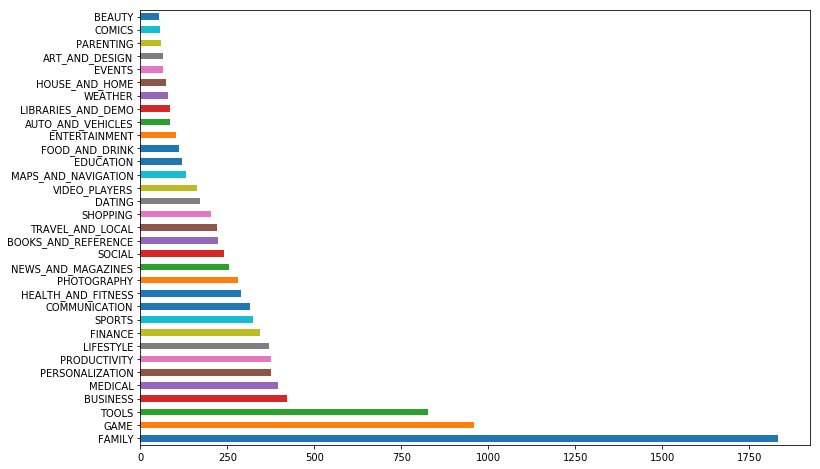

In [20]:
store.Category.value_counts().plot(kind='barh',figsize=(12,8))

[Text(0,0,'ART_AND_DESIGN'),
 Text(0,0,'AUTO_AND_VEHICLES'),
 Text(0,0,'BEAUTY'),
 Text(0,0,'BOOKS_AND_REFERENCE'),
 Text(0,0,'BUSINESS'),
 Text(0,0,'COMICS'),
 Text(0,0,'COMMUNICATION'),
 Text(0,0,'DATING'),
 Text(0,0,'EDUCATION'),
 Text(0,0,'ENTERTAINMENT'),
 Text(0,0,'EVENTS'),
 Text(0,0,'FINANCE'),
 Text(0,0,'FOOD_AND_DRINK'),
 Text(0,0,'HEALTH_AND_FITNESS'),
 Text(0,0,'HOUSE_AND_HOME'),
 Text(0,0,'LIBRARIES_AND_DEMO'),
 Text(0,0,'LIFESTYLE'),
 Text(0,0,'GAME'),
 Text(0,0,'FAMILY'),
 Text(0,0,'MEDICAL'),
 Text(0,0,'SOCIAL'),
 Text(0,0,'SHOPPING'),
 Text(0,0,'PHOTOGRAPHY'),
 Text(0,0,'SPORTS'),
 Text(0,0,'TRAVEL_AND_LOCAL'),
 Text(0,0,'TOOLS'),
 Text(0,0,'PERSONALIZATION'),
 Text(0,0,'PRODUCTIVITY'),
 Text(0,0,'PARENTING'),
 Text(0,0,'WEATHER'),
 Text(0,0,'VIDEO_PLAYERS'),
 Text(0,0,'NEWS_AND_MAGAZINES'),
 Text(0,0,'MAPS_AND_NAVIGATION')]

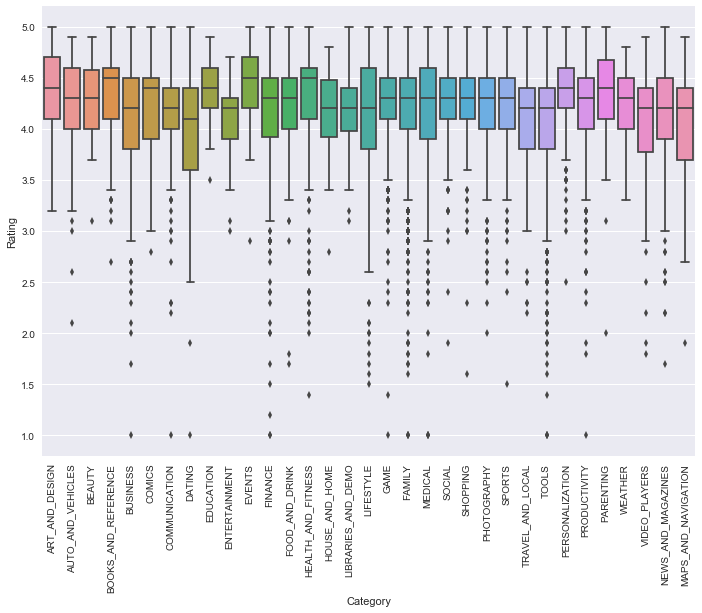

<Figure size 1080x576 with 0 Axes>

In [45]:
#Ratings per category
g = sns.boxplot(x='Category',y='Rating',data = store)
plt.figure(figsize=(15,8))
g.set_xticklabels(g.get_xticklabels(),rotation = 90)

Ratings across categories are pretty similar across the board

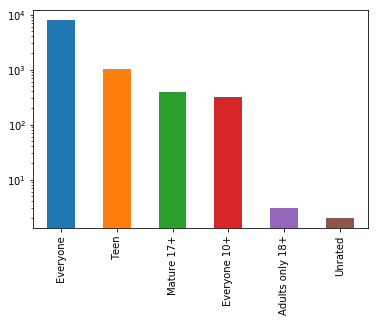

In [22]:
store.Content_Rating.value_counts().plot(kind='bar')
plt.yscale('log')

([<matplotlib.patches.Wedge at 0x1caec604048>,
 [Text(-0.292132,-1.1639,'Free'), Text(0.267788,1.06691,'Paid')],
 [Text(-0.17041,-0.678941,'92.2%'), Text(0.146066,0.581949,'7.8%')])

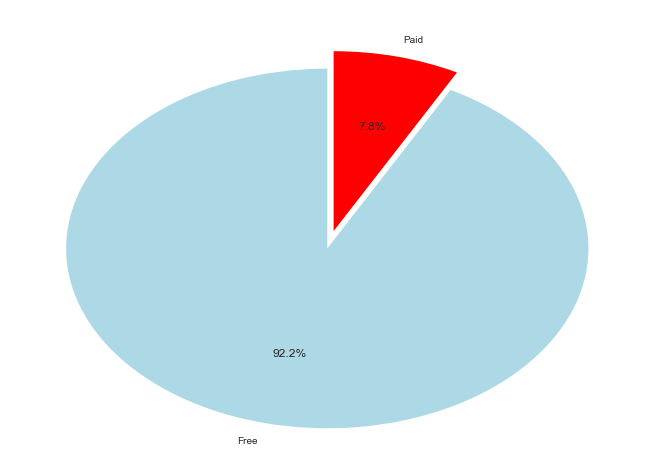

In [46]:
label = store['Type'].value_counts(sort = True).index
size = store['Type'].value_counts(sort = True)

colors = ['lightblue','red']
explode = (.1,0)
plt.pie(size,explode= explode,labels=label,colors = colors,
       autopct='%1.1f%%',startangle=90)